In [111]:
#Let's go 
import pandas as pd 
import requests 
from bs4 import BeautifulSoup as bs 
#pd.set_option('display.max_columns', None)
import time 
import numpy as np 


In [355]:
#As the data is large I ran jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 on jupyter to avoid it temporarily
r = requests.get('https://az.wikipedia.org/wiki/%C4%B0kinci_Qaraba%C4%9F_m%C3%BCharib%C9%99si_%C5%9F%C9%99hidl%C9%99rinin_siyah%C4%B1s%C4%B1')
soup = bs(r.content)
#print(soup.prettify())


In [356]:
table = soup.select('table')[1]
#table

In [114]:
#Lets find  the column names  

columns = table.select('th')
columns

colum_name = [strin.text for strin in columns]
colum_name




['№\n',
 'şəkil\n',
 'Soyadı, adı, atasının adı\n',
 'Qoşun növü\n',
 'Rütbəsi\n',
 'Doğum tarixi\n',
 'Vəfat tarixi\n',
 'Doğum yeri\n',
 'Vəfat yeri\n',
 'Çağırıldığı SHXÇDX idarəsi\n',
 'Təltifləri\n']

In [115]:
#Find the rows  

rows = table.find_all('tr')[1:]
#rows
l = []

for tr in rows: 
    td = tr.find_all('td')
    row = [str(tr.get_text()).strip() for tr in td ]
    l.append(row)
   
     

df = pd.DataFrame(l, columns = colum_name)
pd.set_option('display.max_columns', None)
df 

    

,№\n,şəkil\n,"Soyadı, adı, atasının adı\n",Qoşun növü\n,Rütbəsi\n,Doğum tarixi\n,Vəfat tarixi\n,Doğum yeri\n,Vəfat yeri\n,Çağırıldığı SHXÇDX idarəsi\n,Təltifləri\n
0,1,,Abakarov Nail Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala,
1,2,,Abbasov Ağababa Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,,
2,3,,Abasov Ayaz Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,,
3,4,,Abasov Davud Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,,
4,5,,Abasov Elvin Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,,
...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,,Zülfüqarlı Zeynal Alim,,Kiçik gizir,31.05.1995,,,,,
2721,2721,,Zülfüqarov İlkin Nurəddin,,Kiçik gizir,08.08.1989,,,,,
2722,2722,,Zülfüqarov Məlik Kamran,,Əsgər,27.07.2001,,,,,
2723,2723,,Zülfüqarzadə Fariz Fərhad,Quru Qoşunları,"Əsgər, MAHHXHQ",20.11.1992,19.10.2020,Lənkəran rayonu,Qubadlı rayonu,,


In [358]:
df.head()
#df.drop(['şəkil\n','Təltifləri\n'], axis = 1, inplace = True)
df.head(10)

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Əsgərlərin_yaşı,Count Common Names
№,,,,,,,,,,,
1,Abakarov Nail,Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala,19,Nail
2,Abbasov Ağababa,Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,Melumat verilmiyib,18,Ağababa
3,Abasov Ayaz,Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,Melumat verilmiyib,22,Ayaz
4,Abasov Davud,Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,Melumat verilmiyib,21,Davud
5,Abasov Elvin,Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,Melumat verilmiyib,27,Elvin
6,Abbasov Ruslan,Hikmət,Quru Qoşunları,Əsgər,24.05.2000,14.10.2020,"Sahil, Qaradağ rayonu",Füzuli rayonu,Melumat verilmiyib,20,Ruslan
7,Abasov Samir,Adəm,Quru Qoşunları,Əsgər,24.08.2001,13.10.2020,"Uzunboyad, Şabran rayonu","Talış, Tərtər rayonu",Melumat verilmiyib,19,Samir
8,Abasov Seymur,Adil,Quru Qoşunları,Əsgər,10.08.1999,29.10.2020,"Buravar, Cəlilabad rayonu",Qubadlı,Melumat verilmiyib,21,Seymur
9,Abbasbəyli Həmid,Cavanşir,Xüsusi Təyinatlı Qüvvələr,Baş leytenant,17.11.1991,20.10.2020,Bakı,Laçın,Melumat verilmiyib,29,Həmid


In [ ]:
 #df.columns

In [117]:
df.columns = df.columns.str.replace('\n' , '')
df.columns

Index(['№', 'Soyadı, adı, atasının adı', 'Qoşun növü', 'Rütbəsi',
       'Doğum tarixi', 'Vəfat tarixi', 'Doğum yeri', 'Vəfat yeri',
       'Çağırıldığı SHXÇDX idarəsi'],
      dtype='object')

In [118]:
df.head()

,№,"Soyadı, adı, atasının adı",Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
0,1,Abakarov Nail Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala
1,2,Abbasov Ağababa Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,
2,3,Abasov Ayaz Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,
3,4,Abasov Davud Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,
4,5,Abasov Elvin Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,


In [119]:
#df.set_index('№', inplace = True)
df = df.set_index(df.columns[0])
df

,"Soyadı, adı, atasının adı",Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,
1,Abakarov Nail Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala
2,Abbasov Ağababa Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,
3,Abasov Ayaz Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,
4,Abasov Davud Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,
5,Abasov Elvin Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,
...,...,...,...,...,...,...,...,...
2720,Zülfüqarlı Zeynal Alim,,Kiçik gizir,31.05.1995,,,,
2721,Zülfüqarov İlkin Nurəddin,,Kiçik gizir,08.08.1989,,,,
2722,Zülfüqarov Məlik Kamran,,Əsgər,27.07.2001,,,,


In [359]:
#Coming back and checking these columns  

df.head()
df.loc[['1317','1720', '2424']]

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Əsgərlərin_yaşı,Count Common Names
№,,,,,,,,,,,
1317,İsmət Qismət,Melumat verilmiyib,Melumat verilmiyib,Əsgər,02.04.1998,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,22,Qismət
1720,Aqil Mirzəliyev,Melumat verilmiyib,Melumat verilmiyib,Əsgər,27.08.1999,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,21,Mirzəliyev
2424,Seymur Hüseyn,Melumat verilmiyib,Melumat verilmiyib,Baş leytenant,20.10.1993,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,27,Hüseyn


In [125]:
df.dtypes

Soyadı, adı, atasının adı     object
Qoşun növü                    object
Rütbəsi                       object
Doğum tarixi                  object
Vəfat tarixi                  object
Doğum yeri                    object
Vəfat yeri                    object
Çağırıldığı SHXÇDX idarəsi    object
dtype: object

In [126]:
df.isnull().sum()

Soyadı, adı, atasının adı     0
Qoşun növü                    0
Rütbəsi                       0
Doğum tarixi                  0
Vəfat tarixi                  0
Doğum yeri                    0
Vəfat yeri                    0
Çağırıldığı SHXÇDX idarəsi    0
dtype: int64

In [368]:
df['Vəfat tarixi'] = df['Vəfat tarixi'].replace({'13.10. 2020': '13.10.2020', '02․10․2020': '02.10.2020'})
df['Doğum tarixi'] = df['Doğum tarixi'].replace({'24.04. 1996': '24.04.1996'}) 
 

In [377]:
#df['Doğum tarixi'] = pd.to_datetime(df['Doğum tarixi'], errors ='coerce')
#df['Vəfat tarixi'] = pd.to_datetime(df['Vəfat tarixi'], errors ='coerce')

In [376]:
df.dtypes

Soyadı və adı                         object
Ata Adı                               object
Qoşun növü                            object
Rütbəsi                               object
Doğum tarixi                  datetime64[ns]
Vəfat tarixi                  datetime64[ns]
Doğum yeri                            object
Vəfat yeri                            object
Çağırıldığı SHXÇDX idarəsi            object
Əsgərlərin_yaşı                        int32
Count Common Names                    object
dtype: object

In [129]:
df.columns  

Index(['Soyadı, adı, atasının adı', 'Qoşun növü', 'Rütbəsi', 'Doğum tarixi',
       'Vəfat tarixi', 'Doğum yeri', 'Vəfat yeri',
       'Çağırıldığı SHXÇDX idarəsi'],
      dtype='object')

In [130]:
#Extract The name of Father   
#Help in Practice_Task3 

In [131]:
df.head()

,"Soyadı, adı, atasının adı",Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,
1,Abakarov Nail Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala
2,Abbasov Ağababa Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,
3,Abasov Ayaz Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,
4,Abasov Davud Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,
5,Abasov Elvin Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,


In [132]:
#df['Ata Adı'] = df['Ata Adı'].astype('str')

In [133]:

df['Ata Adı'] = df['Soyadı, adı, atasının adı'].apply(lambda x: x.split(" "))

df['Ata Adı'] = df['Ata Adı'].str[2]   #or str.get(2)  (Instead of Ata you can take a Name)

df.head()

#Lets move the column
    
#df.iloc[:, 2:4]

,"Soyadı, adı, atasının adı",Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Ata Adı
№,,,,,,,,,
1,Abakarov Nail Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala,Müzəffər
2,Abbasov Ağababa Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,,Səfər
3,Abasov Ayaz Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,,Nizami
4,Abasov Davud Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,,Yalçın
5,Abasov Elvin Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,,Səxavət


In [134]:
df['Soyadı və adı'] = df['Soyadı, adı, atasının adı'].apply(lambda x: x.split(" "))
#df['Soyadı və adı'] = df['Soyadı və adı'].str[0]
df['Soyadı və adı'] =  [x[0]+" "+x[1] for x in df['Soyadı və adı']]  

df
#Relocate others


,"Soyadı, adı, atasının adı",Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Ata Adı,Soyadı və adı
№,,,,,,,,,,
1,Abakarov Nail Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala,Müzəffər,Abakarov Nail
2,Abbasov Ağababa Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,,Səfər,Abbasov Ağababa
3,Abasov Ayaz Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,,Nizami,Abasov Ayaz
4,Abasov Davud Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,,Yalçın,Abasov Davud
5,Abasov Elvin Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,,Səxavət,Abasov Elvin
...,...,...,...,...,...,...,...,...,...,...
2720,Zülfüqarlı Zeynal Alim,,Kiçik gizir,31.05.1995,,,,,Alim,Zülfüqarlı Zeynal
2721,Zülfüqarov İlkin Nurəddin,,Kiçik gizir,08.08.1989,,,,,Nurəddin,Zülfüqarov İlkin
2722,Zülfüqarov Məlik Kamran,,Əsgər,27.07.2001,,,,,Kamran,Zülfüqarov Məlik


In [135]:
df.isnull().sum()

Soyadı, adı, atasının adı     0
Qoşun növü                    0
Rütbəsi                       0
Doğum tarixi                  0
Vəfat tarixi                  0
Doğum yeri                    0
Vəfat yeri                    0
Çağırıldığı SHXÇDX idarəsi    0
Ata Adı                       3
Soyadı və adı                 0
dtype: int64

In [136]:
df.columns
col = list(df.columns)
col 
 

['Soyadı, adı, atasının adı',
 'Qoşun növü',
 'Rütbəsi',
 'Doğum tarixi',
 'Vəfat tarixi',
 'Doğum yeri',
 'Vəfat yeri',
 'Çağırıldığı SHXÇDX idarəsi',
 'Ata Adı',
 'Soyadı və adı']

In [137]:
col[-1] #Soyadi
col[-2] #Adi
#col[8]
col[1:8] #Qalanlar


['Qoşun növü',
 'Rütbəsi',
 'Doğum tarixi',
 'Vəfat tarixi',
 'Doğum yeri',
 'Vəfat yeri',
 'Çağırıldığı SHXÇDX idarəsi']

In [138]:
df= df[[col[-1]] + [col[-2]] + col[1:8]]
df

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,,
1,Abakarov Nail,Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala
2,Abbasov Ağababa,Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,
3,Abasov Ayaz,Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,
4,Abasov Davud,Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,
5,Abasov Elvin,Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,
...,...,...,...,...,...,...,...,...,...
2720,Zülfüqarlı Zeynal,Alim,,Kiçik gizir,31.05.1995,,,,
2721,Zülfüqarov İlkin,Nurəddin,,Kiçik gizir,08.08.1989,,,,
2722,Zülfüqarov Məlik,Kamran,,Əsgər,27.07.2001,,,,


In [139]:
#df.drop(['Soyadı, adı, atasının adı'], axis = 1, inplace = True)

In [140]:
df.columns 

Index(['Soyadı və adı', 'Ata Adı', 'Qoşun növü', 'Rütbəsi', 'Doğum tarixi',
       'Vəfat tarixi', 'Doğum yeri', 'Vəfat yeri',
       'Çağırıldığı SHXÇDX idarəsi'],
      dtype='object')

In [141]:
df.head()

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,,
1,Abakarov Nail,Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala
2,Abbasov Ağababa,Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,
3,Abasov Ayaz,Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,
4,Abasov Davud,Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,
5,Abasov Elvin,Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,


In [142]:
df.head()

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,,
1,Abakarov Nail,Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala
2,Abbasov Ağababa,Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,
3,Abasov Ayaz,Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,
4,Abasov Davud,Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,
5,Abasov Elvin,Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,


In [143]:
df[df['Ata Adı'].isnull()]  #3 NaN  after checking
#df[df['Doğum tarixi'].isnull()] #1 NaT after checking


,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,,
1317,İsmət Qismət,NaN,,Əsgər,02.04.1998,,,,
1720,Aqil Mirzəliyev,NaN,,Əsgər,27.08.1999,,,,
2424,Seymur Hüseyn,NaN,,Baş leytenant,20.10.1993,,,,


In [144]:
df.loc[['1317','1720', '2424']]

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,,
1317,İsmət Qismət,NaN,,Əsgər,02.04.1998,,,,
1720,Aqil Mirzəliyev,NaN,,Əsgər,27.08.1999,,,,
2424,Seymur Hüseyn,NaN,,Baş leytenant,20.10.1993,,,,


In [145]:
df.columns

Index(['Soyadı və adı', 'Ata Adı', 'Qoşun növü', 'Rütbəsi', 'Doğum tarixi',
       'Vəfat tarixi', 'Doğum yeri', 'Vəfat yeri',
       'Çağırıldığı SHXÇDX idarəsi'],
      dtype='object')

In [146]:
df.isnull().sum()

Soyadı və adı                 0
Ata Adı                       3
Qoşun növü                    0
Rütbəsi                       0
Doğum tarixi                  0
Vəfat tarixi                  0
Doğum yeri                    0
Vəfat yeri                    0
Çağırıldığı SHXÇDX idarəsi    0
dtype: int64

In [147]:
#df['Soyadı və adı'].value_counts().head(50)
#df[df['Soyadı və adı'].isnull()]
 
df[df['Ata Adı'].isnull()]  #3 -> NaN
df['Qoşun növü'].value_counts()  # 2606 -> ' '(spaces)
df['Vəfat tarixi'].value_counts()  #2501 -> ' ' (spaces)
df['Çağırıldığı SHXÇDX idarəsi'].value_counts()  #2674 -> ' ' (spaces)

#Lets work on these

                                   2674
Oğuz                                 16
Goranboy                              5
Salyan                                4
Bakı, Qaradağ                         3
Xaçmaz, Oğuz                          2
SHXÇDX-nin Abşeron Rayon Şöbəsi       1
Füzuli                                1
Ağcabədi                              1
Yardımlı rayonu                       1
Saatlı                                1
Gəncə                                 1
Göygöl                                1
Göytəpə şəhəri                        1
Yevlax                                1
Zaqatala                              1
SHXÇDX-nin Xaçmaz Rayon Şöbəsi        1
Lənkəran                              1
Tovuz                                 1
Bərdə                                 1
Sabirabad                             1
Neftçala rayonu                       1
Kürdmaşı, İsmayıllı                   1
Oğuz rayonu                           1
İsmayıllı                             1


In [148]:
import re
value = 'Melumat verilmiyib'
df = df.replace('^\s*$', value, regex=True)  #For all empty columns  
 

df['Ata Adı'] = df['Ata Adı'].fillna(value)

df[df['Ata Adı'] == 'Melumat Verilmiyib']
#df[df['Ata Adı'].isnull()]  #0 -> NaN 


,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi
№,,,,,,,,,


In [149]:
df.head(50)
df['Doğum tarixi'].value_counts()

01.01.2000    8
29.08.2001    5
01.09.1997    4
01.05.2001    4
15.01.1997    4
             ..
28.08.1979    1
20.10.1997    1
03.11.1988    1
13.02.1986    1
27.07.2001    1
Name: Doğum tarixi, Length: 2136, dtype: int64

In [150]:
#Yaş
df['Əsgərlərin yaşı'] = df['Doğum tarixi'].apply(lambda x: 2020 - int(str(x)[6:]))
df['Əsgərlərin yaşı'] = df['Əsgərlərin yaşı'].astype('str')
df['Əsgərlərin yaşı']  = df['Əsgərlərin yaşı'].str[0:]


In [151]:
df['Doğum yeri'].value_counts().head(50)

Melumat verilmiyib                              2462
Sabirabad                                         32
Bakı                                              12
Gəncə                                              8
Sumqayıt                                           6
Mingəçevir                                         6
Xaçmaz, Oğuz                                       6
Salyan rayonu                                      5
Goranboy, Fəxralı                                  4
Saatlı                                             4
Daşkəsən                                           3
Samux                                              3
Salyan                                             3
Şamaxı                                             3
Oğuz                                               3
Göyçay                                             3
Ağstafa                                            2
Füzuli                                             2
Xalxalqışlaq, Oğuz                            

In [362]:
#Əsgərin yaşı 
df['Əsgərlərin_yaşı'] = df['Əsgərlərin_yaşı'].astype('int')
df.head(10)

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Əsgərlərin_yaşı,Count Common Names
№,,,,,,,,,,,
1,Abakarov Nail,Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala,19,Nail
2,Abbasov Ağababa,Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,Melumat verilmiyib,18,Ağababa
3,Abasov Ayaz,Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,Melumat verilmiyib,22,Ayaz
4,Abasov Davud,Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,Melumat verilmiyib,21,Davud
5,Abasov Elvin,Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,Melumat verilmiyib,27,Elvin
6,Abbasov Ruslan,Hikmət,Quru Qoşunları,Əsgər,24.05.2000,14.10.2020,"Sahil, Qaradağ rayonu",Füzuli rayonu,Melumat verilmiyib,20,Ruslan
7,Abasov Samir,Adəm,Quru Qoşunları,Əsgər,24.08.2001,13.10.2020,"Uzunboyad, Şabran rayonu","Talış, Tərtər rayonu",Melumat verilmiyib,19,Samir
8,Abasov Seymur,Adil,Quru Qoşunları,Əsgər,10.08.1999,29.10.2020,"Buravar, Cəlilabad rayonu",Qubadlı,Melumat verilmiyib,21,Seymur
9,Abbasbəyli Həmid,Cavanşir,Xüsusi Təyinatlı Qüvvələr,Baş leytenant,17.11.1991,20.10.2020,Bakı,Laçın,Melumat verilmiyib,29,Həmid


In [163]:
#Count most common names
df['Count Common Names']= df['Soyadı və adı'].apply(lambda x: x.split(" "))
 
df['Count Common Names']  = [x[1] for x in df['Count Common Names'] ]
 
df['Count Common Names'].value_counts().head(20)


Elvin       52
Orxan       46
Elnur       44
Vüsal       42
Əli         35
Elçin       33
Fərid       32
Tural       31
Nicat       31
Kənan       30
Elməddin    30
Ruslan      30
Anar        30
Elşən       29
Murad       29
Rəşad       27
Samir       27
Məhəmməd    25
Nurlan      25
Ceyhun      24
Name: Count Common Names, dtype: int64

Text(0, 0.5, 'Ölən şəhidlərin sayı')

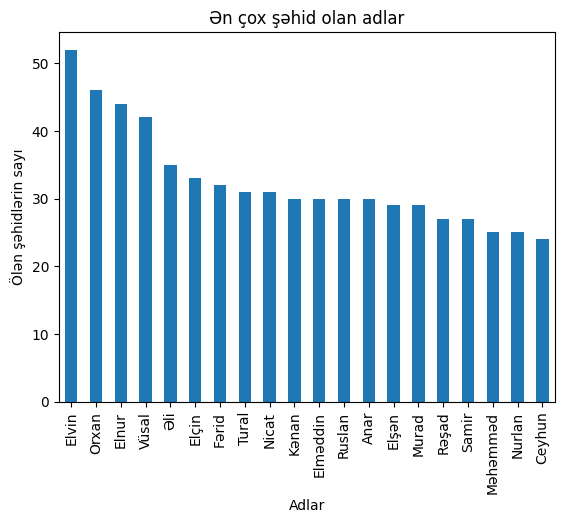

In [175]:
import matplotlib.pyplot as plt
df['Count Common Names'].value_counts()[:20].plot(kind='bar')
plt.title('Ən çox şəhid olan adlar')
plt.xlabel("Adlar")
plt.ylabel("Ölən şəhidlərin sayı")

In [159]:
df.tail(10)

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Əsgərlərin yaşı,Count Common Names
№,,,,,,,,,,,
2715,Zeynalov Tural,Ruslan,Melumat verilmiyib,Kapitan,04.10.1987,11.10.2020,Binəqədi rayonu,Füzuli rayonu,Melumat verilmiyib,33,Tural
2716,Zeynalov Turqut,Fikrət,Melumat verilmiyib,"Əsgər, MAHHXHQ",20.08.1996,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,24,Turqut
2717,Zahirov Nazim,Həmzə,Melumat verilmiyib,Əsgər,25.06.2001,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,19,Nazim
2718,Zeyniyev Rəşad,Ələkbər,Melumat verilmiyib,Əsgər,13.09.2001,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,19,Rəşad
2719,Ziyadov Fəqan,Ziyad,Melumat verilmiyib,"Əsgər, MAHHXHQ",01.01.1995,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,25,Fəqan
2720,Zülfüqarlı Zeynal,Alim,Melumat verilmiyib,Kiçik gizir,31.05.1995,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,25,Zeynal
2721,Zülfüqarov İlkin,Nurəddin,Melumat verilmiyib,Kiçik gizir,08.08.1989,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,31,İlkin
2722,Zülfüqarov Məlik,Kamran,Melumat verilmiyib,Əsgər,27.07.2001,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,Melumat verilmiyib,19,Məlik
2723,Zülfüqarzadə Fariz,Fərhad,Quru Qoşunları,"Əsgər, MAHHXHQ",20.11.1992,19.10.2020,Lənkəran rayonu,Qubadlı rayonu,Melumat verilmiyib,28,Fariz


Quru Qoşunları               85
Xüsusi Təyinatlı Qüvvələr    14
Hərbi Dəniz Qüvvələri        10
Daxili Qoşunlar               5
Sərhəd Qoşunları              4
Hərbi Hava Qüvvələri          1
Name: Qoşun növü, dtype: int64

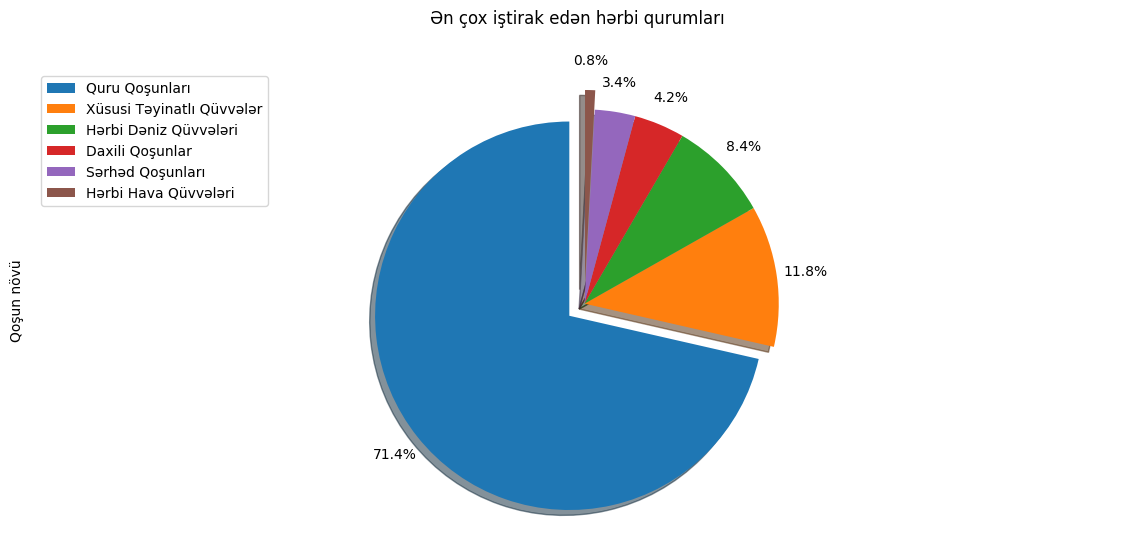

In [284]:
q = df[df["Qoşun növü"].str.contains("Melumat verilmiyib")==False]
q_n= q['Qoşun növü'].value_counts()
explode_list = [0.1, 0, 0, 0, 0, 0.1]
q['Qoşun növü'].value_counts().plot(
                                kind='pie',
                                figsize = (14,6),
                                autopct = '%1.1f%%', 
                                startangle = 90, 
                                shadow = True,
                                pctdistance=1.15,
                                explode = explode_list,
                                labels=None)
plt.legend(labels = q_n.index, loc = 'upper left')
# scale the title up by 12% to match pctdistance
plt.axis('equal') 
plt.title('Ən çox iştirak edən hərbi qurumları', y=1.08) 
plt.show()



In [341]:
df.head()

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Əsgərlərin_yaşı,Count Common Names
№,,,,,,,,,,,
1,Abakarov Nail,Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala,19,Nail
2,Abbasov Ağababa,Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,Melumat verilmiyib,18,Ağababa
3,Abasov Ayaz,Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,Melumat verilmiyib,22,Ayaz
4,Abasov Davud,Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,Melumat verilmiyib,21,Davud
5,Abasov Elvin,Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,Melumat verilmiyib,27,Elvin


Text(0.5, 0, 'Yaşı')

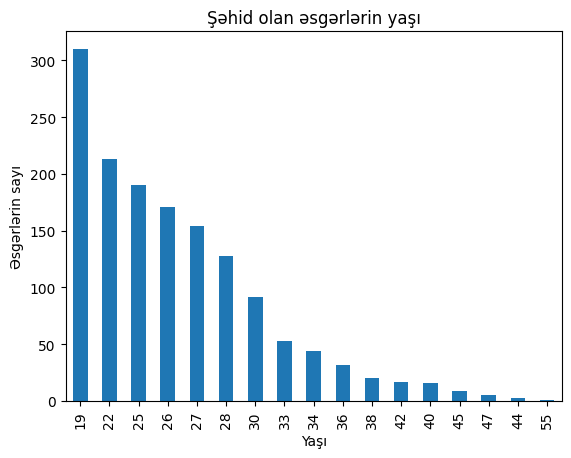

In [348]:
df['Əsgərlərin_yaşı'].value_counts()[::2].plot(kind = 'bar')
plt.title('Şəhid olan əsgərlərin yaşı')
plt.ylabel('Əsgərlərin sayı')
plt.xlabel('Yaşı')

In [250]:
df.head()

,Soyadı və adı,Ata Adı,Qoşun növü,Rütbəsi,Doğum tarixi,Vəfat tarixi,Doğum yeri,Vəfat yeri,Çağırıldığı SHXÇDX idarəsi,Əsgərlərin yaşı,Count Common Names
№,,,,,,,,,,,
1,Abakarov Nail,Müzəffər,Quru Qoşunları,Əsgər,24.07.2001,04.10.2020,"Kazan, Rusiya",Ağdərə,Zaqatala,19,Nail
2,Abbasov Ağababa,Səfər,Quru Qoşunları,Əsgər,14.03.2002,29.09.2020,"Uzunboyad, Şabran rayonu",Füzuli,Melumat verilmiyib,18,Ağababa
3,Abasov Ayaz,Nizami,Daxili Qoşunlar,"Əsgər, MAHHXHQ",20.12.1998,03.10.2020,Cəlilabad rayonu,Cəbrayıl,Melumat verilmiyib,22,Ayaz
4,Abasov Davud,Yalçın,Sərhəd Qoşunları,Kiçik gizir,19.11.1999,16.10.2020,"Sabirabad, Cəlilabad",Cəbrayıl,Melumat verilmiyib,21,Davud
5,Abasov Elvin,Səxavət,Quru Qoşunları,Əsgər,17.06.1993,22.11.2020,Şamaxı,Ağcabədi,Melumat verilmiyib,27,Elvin


In [261]:
#df[(df['Qoşun növü'] == 'Quru Qoşunları') &( df['Rütbəsi'] == 'Əsgər')] 
df[df['Qoşun növü'] == 'Quru Qoşunları'].Rütbəsi.value_counts()


Əsgər                  44
Əsgər, MAHHXHQ         11
Baş leytenant           7
Mayor                   6
Gizir                   4
Leytenant               4
Polkovnik-leytenant     3
Kapitan                 2
Polkovnik               1
Çavuş, MAHHXHQ          1
Baş əsgər               1
Kiçik gizir             1
Name: Rütbəsi, dtype: int64

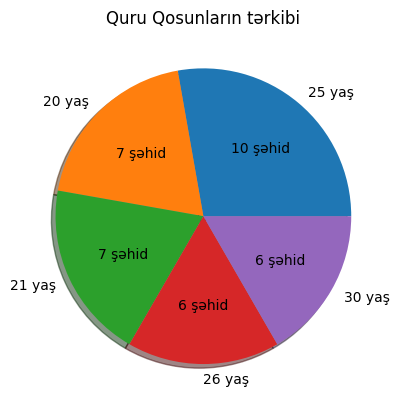

In [349]:
#Quru qoşunların tərkibi
df.head()
#Rename a column to access it easily  

df = df.rename(columns = {'Əsgərlərin yaşı':'Əsgərlərin_yaşı'})
df.head()
 
labels = ['25','20','21','26','30']
 
list2 = [ls+" yaş" for ls in labels] # using list comprehension
#print(list2)

df_q = df[df['Qoşun növü'] == 'Quru Qoşunları'].Əsgərlərin_yaşı.value_counts()[:5].sort_values(ascending = False)

plt.figure()

plt.pie(df_q, labels=list2, autopct=lambda x:f'{x*sum(df_q)/100 :.0f} şəhid', shadow = True)
plt.title('Quru Qosunların tərkibi')
plt.show()


#df_q.plot(autopct='%1.0f%%', kind = 'pie', labels=labels)


In [354]:
#df.plot(subplots=True, figsize=(10, 8), layout=(2, 2))
df['Doğum yeri'].value_counts().head(20)

Melumat verilmiyib    2462
Sabirabad               32
Bakı                    12
Gəncə                    8
Sumqayıt                 6
Mingəçevir               6
Xaçmaz, Oğuz             6
Salyan rayonu            5
Goranboy, Fəxralı        4
Saatlı                   4
Daşkəsən                 3
Samux                    3
Salyan                   3
Şamaxı                   3
Oğuz                     3
Göyçay                   3
Ağstafa                  2
Füzuli                   2
Xalxalqışlaq, Oğuz       2
Beyləqan                 2
Name: Doğum yeri, dtype: int64